## Using Google Trends to analyze macroeconomic trends, voting in US and rent in Europe



In [6]:
!pip install streamlit_jupyter
!pip install jupytext

  Using cached streamlit_jupyter-0.2.1-py3-none-any.whl (13 kB)
  Using cached fastcore-1.5.29-py3-none-any.whl (67 kB)
  Using cached ipywidgets-7.7.2-py2.py3-none-any.whl (123 kB)
  Using cached stqdm-0.0.5-py3-none-any.whl (11 kB)
  Using cached streamlit-1.23.1-py2.py3-none-any.whl (8.9 MB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached widgetsnbextension-3.6.4-py2.py3-none-any.whl (1.6 MB)
  Using cached jupyterlab_widgets-1.1.4-py3-none-any.whl (246 kB)
  Using cached altair-5.0.1-py3-none-any.whl (471 kB)
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached importlib_metadata-6.6.0-py3-none-any.whl (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 4.8 MB/s eta 0:00:0000:0100:01
  Using cached protobuf-4.23.2-cp37-abi3-macosx_10_9_universal2.whl (400 kB)
     ━━━━━━━━

# Part 0. Looking into Google Trends Data. Downloading data and Overview.

In this section I get all Google Trends data using pytrends - unofficial API for Google Trends. Using this data I build various linear regressions between Google Trends data and Macroeconomics Indicators.

Macroeconomics indicators that I will be using:
*   USA GDP
*   USA Unemployment rate
*   USA Inflation rate

## Loading *data*

In [8]:
#We will need Google trends therefore we download unofficial google trends package
!pip install pytrends

I download all basic libraries that will be useful for the project.

In [11]:
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pytrends.request import TrendReq
pytrends = TrendReq()
import numpy as np
import pandas as pd
import numpy.linalg as LA
import io
import matplotlib.pyplot as plt

### Download Google Trends
I choose interesting queries that I think might be related to the macroeconomics variables.

I make a Dataframe (df) which includes all of them.
DISCLAIMER: DO NOT REPEAT THIS SELL TOO OFTEN. YOU CAN BE BLOCKED BY GOOGLE TRENDS!

In [ ]:
df = pd.DataFrame()
queries_to_test = [['food'],
                   ['mexico'],
                   ['fitness club'],
                   ['vacation'],
                   ['buy a car'],
                   ['netflix'],
                   ['depression'],
                   ['doctor'],
                   ['fox news'],
                   ['sex'],
                   ['iphone'],
                   ['find job'],
                   ['food near me'],
                   ['insurance'],
                   ['education'],
                   ['restaurants around'],
                   ['petrol price'],
                   ['rent flat'],
                   ['children names'],
                   ['amazon'],
                   ['good restaurants'],
                   ['diet'],
                   ['credit cards'],
                   ['USA'],
                   ['travel'],
                   ['IT'],
                   ['unemployment benefits'],
                   ['alcohol'],
                   ['best films'],
                   ['books'],
                   ['imagine dragons'],
                   ['stocks'],
                   ['harry potter'],
                   ['social payments'],
                   ['online courses'],
                   ['wedding dress'],
                   ['clothes'],
                   ['cheap clothes'],
                   ['order food'],
                   ['delivery'],
                   ['food delivery'],
                   ['paid jobs'],
                   ['best banks'],
                   ['Stanford'],
                   ['Excel'],
                   ['Facebook'],
                   ['Trump'],
                   ['Elon Musk'],
                   ['buy car'],
                   ['loans'],
                   ['cats'],
                   ['dogs'],
                   ['tinder'],
                   ['credit cards'],
                   ['bbc'],
                   ['late night show'],
                   ['presents'],
                   ['recipes'],
                   ['dairy'],
                   ['walmart'],
                   ['best songs'],
                   ['McDonald\'s'],
                   ['buy food'],
                   ['Starbucks'],
                   ['Taco Bell'],
                   ['Wendy\'s'],
                   ['news'],
                   ['booking'],
                   ['order online'],
                   ['beauty salon']
                   ]

for search in queries_to_test:
    time.sleep(5)
    pytrends.build_payload(search, timeframe='all', geo = 'US')
    df[search] = pytrends.interest_over_time()[search]

Most recent months do not have accurate GDP data therefore I remove them.

In [ ]:
df = df[:-2]

### Download Macroeconomics Trends
First I add GDP column, which is taken from FRED Statistics (https://fred.stlouisfed.org/series/GDP)

In [ ]:
import pandas as pd
GDP_quarter = list(pd.read_csv('data/GDP.csv')['GDP'])

GDP_month = np.zeros(len(df))
for i in range(77*3):
    GDP_month[i] = GDP_quarter[i // 3]

df['GDP'] = GDP_month

Then I add monthly unemployment rates (https://fred.stlouisfed.org/series/UNRATE)

In [ ]:
Unemployment = pd.read_csv('data/Unemployment.csv')['UNRATE'][:-1] #I delete recent data
Unemployment = np.array(Unemployment)
df['Unemployment'] = Unemployment

Finally, I add monthly inflation (https://fred.stlouisfed.org/series/T5YIE)

In [ ]:
Inflation = pd.read_csv('data/Inflation.csv')['T5YIE'][:-2] #I delete recent data
Inflation = np.array(Inflation)
df['Inflation'] = Inflation
df

Now I save the data we got into df_part1.csv.

In [ ]:
df.to_csv(r'/Users/alina/Programming/Data-Analysis-Project/data/df_part1.csv')

## Google Trends analysis

I have to point out the parsing part above can result in error because I used not an official Google API. I have saved the results into df_part1.csv. If you encountered a mistake above just proceed with the code bellow.

In [347]:
df = pd.read_csv('data/df_part1.csv', sep = ';')
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df

,food,mexico,fitness club,vacation,buy a car,netflix,depression,doctor,fox news,sex,...,Starbucks,Taco Bell,Wendy's,news,booking,order online,beauty salon,GDP,Unemployment,Inflation
date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,41,63,100,87,47,5,80,32,9,76,...,13,9,9,39,33,16,57,11923.447,5.7,2.035500
2004-02-01,40,66,79,84,44,4,100,30,9,77,...,13,8,9,39,32,18,55,11923.447,5.6,2.210000
2004-03-01,38,63,74,76,48,5,93,32,9,71,...,13,9,9,37,28,15,47,11923.447,5.8,2.271739
2004-04-01,40,59,72,72,56,5,97,31,10,72,...,13,9,10,40,31,14,58,12112.815,5.6,2.373810
2004-05-01,41,67,66,84,55,5,85,32,11,79,...,13,9,9,40,29,17,57,12112.815,5.6,2.512500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,83,100,24,38,79,61,57,62,48,34,...,88,68,43,47,76,47,61,26137.992,3.6,2.444500
2022-12-01,87,56,28,58,82,65,62,58,39,35,...,82,69,48,48,82,48,63,26137.992,3.5,2.316667
2023-01-01,85,55,34,48,88,62,60,65,41,35,...,66,66,38,49,91,44,60,26486.287,3.4,2.234000


Now I plot trends for 5 searches to see how the trends were changing overt time.

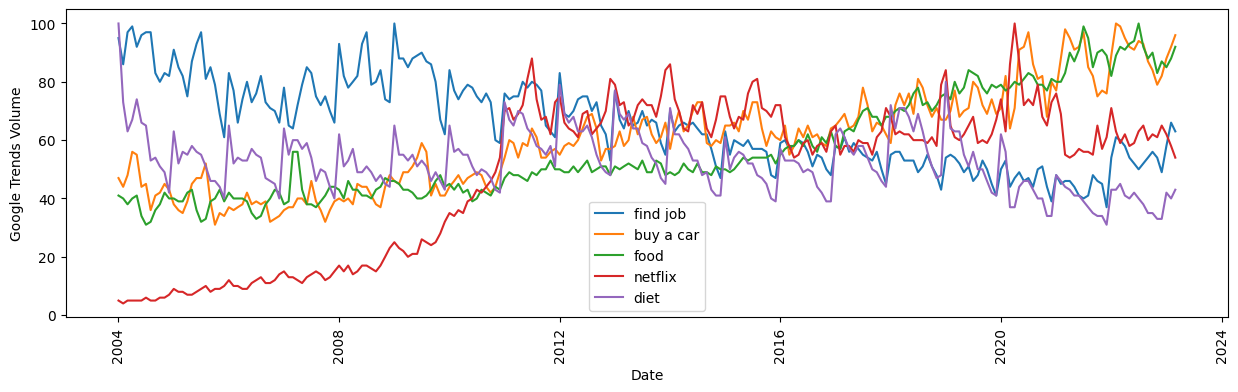

In [203]:
plt.plot(df['find job'], label = "find job")
plt.plot(df['buy a car'], label = "buy a car")
plt.plot(df['food'], label = "food")
plt.plot(df['netflix'], label = "netflix")
plt.plot(df['diet'], label = "diet")
plt.title("")
plt.rcParams["figure.figsize"] = (15, 4)

# set the x-axis ticks to appear every other month
 # every other month

plt.xticks(rotation=90) # set the x-axis ticks to appear every other month
plt.xlabel("Date")
plt.ylabel("Google Trends Volume")
plt.legend()
plt.show()
df.reset_index()

plt.show()

Let's check how volatile popularity of different searches.

As we can see, from the chosen subset of searches the least volatile are "loans", "bbc", "insurance", "clothes". The most volatile are "amazon", "Taco Bell", "food near me", "Facebook".

In [209]:
var_list = []
for col in df.columns.drop(['GDP', 'Unemployment', 'Inflation']):
    var_list.append({'Query': col, 'Volatility': np.var(df[col])})

var_df = pd.DataFrame(var_list).sort_values(by = 'Volatility', ascending=False)
var_df

,Query,Volatility
45,Facebook,975.487041
12,food near me,887.861172
63,Taco Bell,724.008583
19,amazon,691.706790
5,netflix,650.016229
...,...,...
33,social payments,63.910721
36,clothes,56.860778
13,insurance,56.002624
53,bbc,54.341073


Now I plot the most volatile searches.

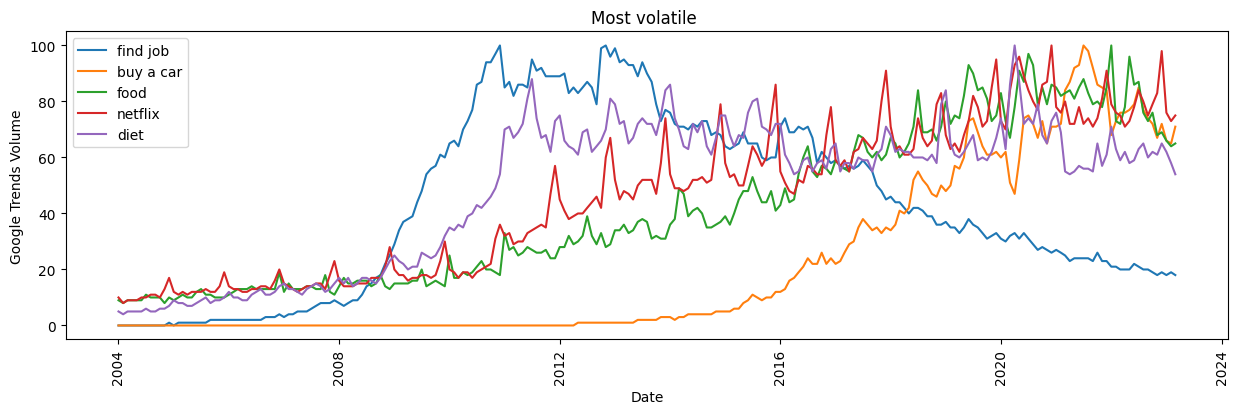

In [204]:
plt.plot(df['Facebook'], label = "find job")
plt.plot(df['food near me'], label = "buy a car")
plt.plot(df['Taco Bell'], label = "food")
plt.plot(df['amazon'], label = "netflix")
plt.plot(df['netflix'], label = "diet")
plt.title("Most volatile ")
plt.rcParams["figure.figsize"] = (15, 4)

# set the x-axis ticks to appear every other month
# every other month

plt.xticks(rotation=90) # set the x-axis ticks to appear every other month
plt.xlabel("Date")
plt.ylabel("Google Trends Volume")
plt.legend()
plt.show()
df.reset_index()

plt.show()

Now we can try to check how the searching activity relates to the month.
Mean_by_month dataset shows the average number of GoogleTrends activity for each search for each month.

In [154]:
df = df.reset_index()
# Create a new column with the month
df['month'] = df['date'].dt.month

# Group by month
mean_by_month = df.groupby('month').mean()
mean_by_month


,date,food,mexico,fitness club,vacation,buy a car,netflix,depression,doctor,fox news,...,Starbucks,Taco Bell,Wendy's,news,booking,order online,beauty salon,GDP,Unemployment,Inflation
month,,,,,,,,,,,,,,,,,,,,,
1,2013-07-02 06:00:00.000000000,56.250000,52.400000,56.850000,66.450000,57.650000,53.750000,63.400000,52.000000,31.250000,...,44.000000,42.400000,32.550000,50.500000,53.200000,28.200000,60.250000,17670.663050,5.765000,1.888001
2,2013-08-02 06:00:00.000000000,56.150000,52.650000,46.250000,60.700000,61.500000,47.700000,70.250000,50.350000,30.450000,...,41.050000,39.600000,31.350000,49.700000,54.450000,28.750000,64.500000,17670.663050,5.750000,1.987263
3,2013-08-30 12:00:00.000000000,58.550000,57.500000,44.350000,60.950000,62.000000,47.150000,70.950000,50.600000,30.800000,...,42.350000,40.000000,33.250000,51.300000,56.050000,29.650000,67.200000,17670.663050,5.770000,2.036130
4,2013-03-31 21:28:25.263158016,57.368421,51.000000,41.157895,56.052632,59.263158,46.368421,71.368421,50.052632,28.947368,...,42.894737,39.421053,33.421053,48.842105,51.473684,29.368421,66.631579,17322.612737,6.415789,2.036851
5,2013-04-30 21:28:25.263158016,56.684211,53.473684,43.789474,60.736842,62.947368,45.894737,65.421053,51.526316,28.105263,...,46.157895,42.263158,36.210526,47.526316,55.105263,29.210526,72.578947,17322.612737,6.315789,2.025852
6,2013-05-31 21:28:25.263158016,55.947368,62.684211,46.263158,70.526316,62.000000,48.263158,51.684211,50.315789,28.421053,...,45.000000,44.000000,39.052632,48.105263,58.263158,28.000000,71.842105,17322.612737,6.200000,1.986997
7,2013-06-30 21:28:25.263158016,57.421053,54.789474,45.684211,69.210526,66.631579,49.894737,50.315789,50.473684,29.578947,...,45.263158,46.526316,37.842105,49.157895,59.473684,28.210526,71.157895,17604.919842,6.115789,1.943072
8,2013-07-31 21:28:25.263158016,55.842105,49.315789,44.157895,56.315789,63.526316,48.105263,50.052632,51.631579,31.157895,...,44.421053,42.263158,36.000000,50.263158,57.736842,28.473684,71.473684,17604.919842,6.021053,1.872765
9,2013-08-31 21:28:25.263158016,55.736842,53.210526,39.526316,43.421053,57.894737,46.578947,58.842105,49.473684,31.473684,...,45.052632,40.000000,34.052632,51.578947,52.421053,28.157895,64.263158,17604.919842,5.926316,1.812160


Now I check how volatile this relation and get the list of most season-dependent searches. These are "presents", "vacation", "depression" and surprisingly "walmart".

In [207]:
var_list = []
for col in mean_by_month.columns.drop(['date', 'Inflation', 'GDP', 'Unemployment']):
    var_list.append({'Query': col, 'Volatility': np.var(mean_by_month[col])})

var_months = pd.DataFrame(var_list).sort_values(by = 'Volatility', ascending=False)
var_months

,Query,Volatility
55,presents,298.157582
3,vacation,91.972736
58,walmart,70.207243
6,depression,55.775107
56,recipes,49.366600
...,...,...
52,tinder,1.371102
53,bbc,1.232099
7,doctor,0.833248
67,order online,0.782343


### Now I build a bar-chart for each seasonally-dependent search.
The pick of activity for the search "presents" occurs in November and December. Which indicates that Christmas and New Year are the most popular holidays.

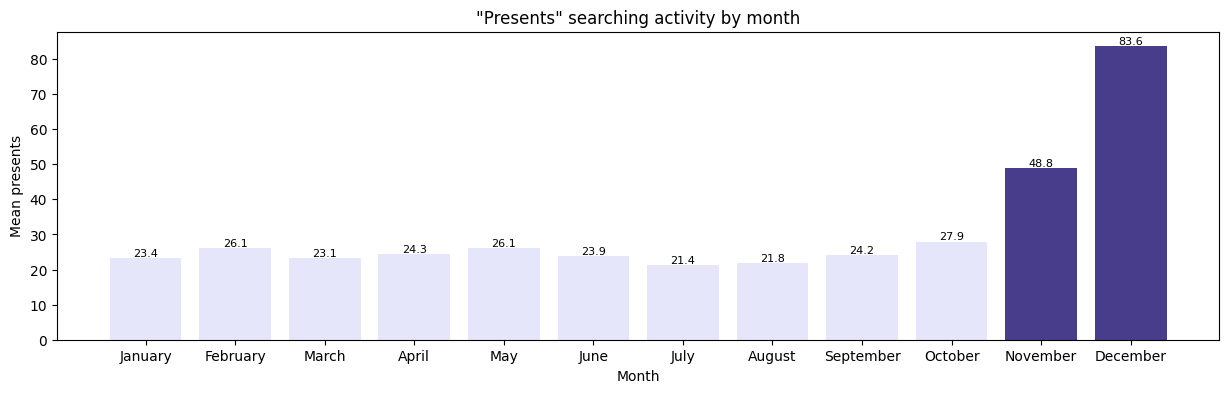

In [215]:
# create a bar chart for the 'presents' column
# Set the color scheme
# Define the colors for the bars
colors = ['lavender'] * 12
colors[-2:] = ['darkslateblue'] * 2


# Create the bar plot
fig, ax = plt.subplots()
mean_by_month['month'] = mean_by_month.index
ax.bar(mean_by_month['month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B')), mean_by_month['presents'], color=colors)

# Set the title and axis labels
ax.set_title('"Presents" searching activity by month')
ax.set_xlabel('Month')
ax.set_ylabel('Mean presents')

# Add values above each bar
for i, v in enumerate(mean_by_month['presents']):
    ax.text(i, v + 0.5, str(round(v, 1)), ha='center', fontsize=8)

# Show the plot
plt.show()


The pick of activity for the search "vacation" occurs in June and July. The third month by popularity is January. It indicates that summer holidays are the most prominent.

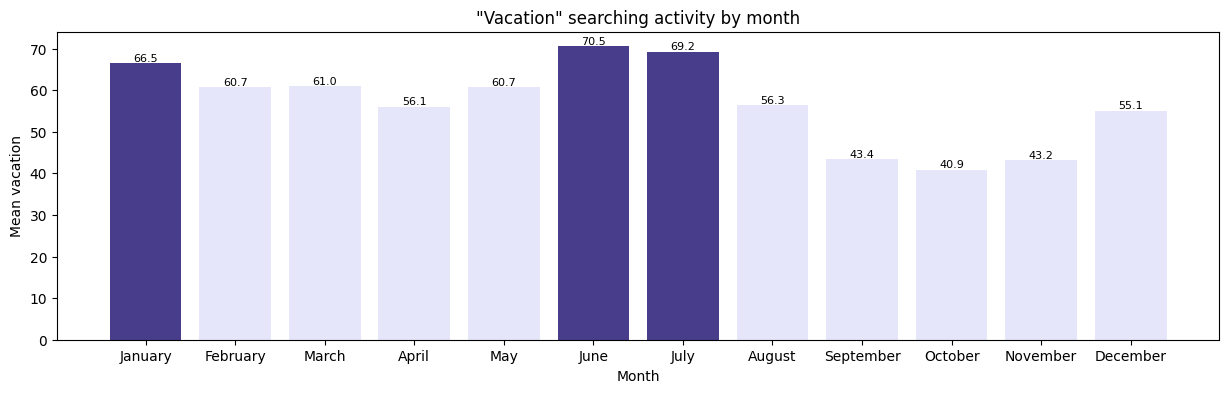

In [216]:
# create a bar chart for the 'presents' column
# Set the color scheme
# Define the colors for the bars
colors = ['lavender'] * 12
colors[0] = 'darkslateblue'
colors[5] = 'darkslateblue'
colors[6] = 'darkslateblue'

# Create the bar plot
fig, ax = plt.subplots()
mean_by_month['month'] = mean_by_month.index
ax.bar(mean_by_month['month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B')), mean_by_month['vacation'], color=colors)

# Set the title and axis labels
ax.set_title('"Vacation" searching activity by month')
ax.set_xlabel('Month')
ax.set_ylabel('Mean vacation')

# Add values above each bar
for i, v in enumerate(mean_by_month['vacation']):
    ax.text(i, v + 0.5, str(round(v, 1)), ha='center', fontsize=8)

# Show the plot
plt.show()

For the search "depression" the activity during summer months is low. I conclude that during the summer people emotionally fill themselves better than during the other time of the year. By the end of the winter people get tired from the cold and the number of "depression" searches increases.

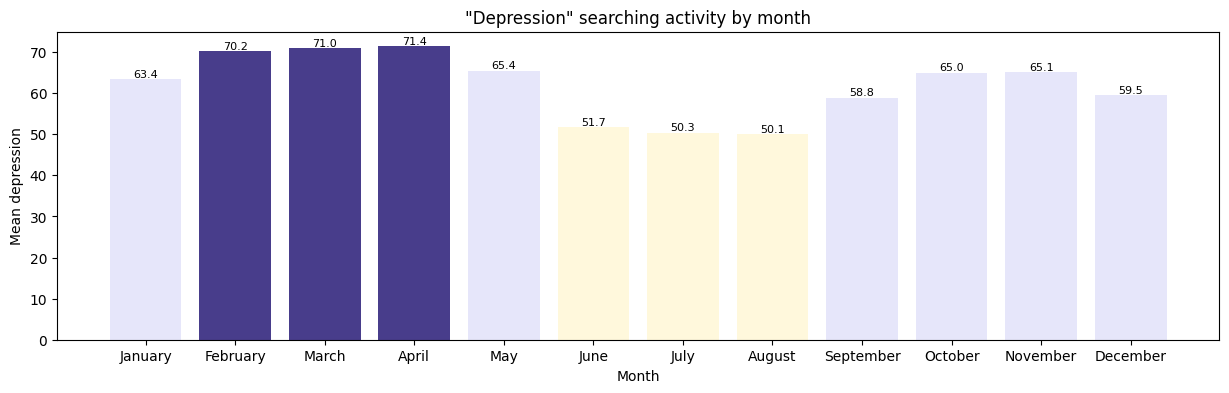

In [220]:
# create a bar chart for the 'presents' column
# Set the color scheme
# Define the colors for the bars
colors = ['lavender'] * 12
colors[1:3] = ['darkslateblue'] * 3
colors[5:7] = ['cornsilk'] * 3


# Create the bar plot
fig, ax = plt.subplots()
mean_by_month['month'] = mean_by_month.index
ax.bar(mean_by_month['month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B')), mean_by_month['depression'], color=colors)

# Set the title and axis labels
ax.set_title('"Depression" searching activity by month')
ax.set_xlabel('Month')
ax.set_ylabel('Mean depression')

# Add values above each bar
for i, v in enumerate(mean_by_month['depression']):
    ax.text(i, v + 0.5, str(round(v, 1)), ha='center', fontsize=8)

# Show the plot
plt.show()

# Part 1. Analyzing relation between Google trends and Macroeconomics trends.

I will test the same queries I got in the part 0.

In [299]:
queries_to_test = [['dogs'],
                   ['food'],
                   ['mexico'],
                   ['fitness club'],
                   ['vacation'],
                   ['buy a car'],
                   ['netflix'],
                   ['depression'],
                   ['doctor'],
                   ['fox news'],
                   ['sex'],
                   ['iphone'],
                   ['find job'],
                   ['food near me'],
                   ['insurance'],
                   ['education'],
                   ['restaurants around'],
                   ['petrol price'],
                   ['rent flat'],
                   ['children names'],
                   ['amazon'],
                   ['good restaurants'],
                   ['diet'],
                   ['credit cards'],
                   ['USA'],
                   ['travel'],
                   ['IT'],
                   ['unemployment benefits'],
                   ['alcohol'],
                   ['best films'],
                   ['books'],
                   ['imagine dragons'],
                   ['stocks'],
                   ['harry potter'],
                   ['social payments'],
                   ['online courses'],
                   ['wedding dress'],
                   ['clothes'],
                   ['cheap clothes'],
                   ['order food'],
                   ['delivery'],
                   ['food delivery'],
                   ['paid jobs'],
                   ['best banks'],
                   ['Stanford'],
                   ['Excel'],
                   ['Facebook'],
                   ['Trump'],
                   ['Elon Musk'],
                   ['buy car'],
                   ['loans'],
                   ['cats'],
                   ['tinder'],
                   ['credit cards'],
                   ['bbc'],
                   ['late night show'],
                   ['presents'],
                   ['recipes'],
                   ['dairy'],
                   ['walmart'],
                   ['best songs'],
                   ['McDonald\'s'],
                   ['buy food'],
                   ['Starbucks'],
                   ['Taco Bell'],
                   ['Wendy\'s'],
                   ['news'],
                   ['booking'],
                   ['order online'],
                   ['beauty salon']
                   ]

I need to choose the best queries. To do that I will test different queries one by one. For each particular query I build a linear regression on the early data (the earliest 30%). I save the results of regression to use it for the further analysis.
Bellow I also demonstrate this relation by building graphics for the first 5 searches in the list.

Name:  dogs
Coefficient: 203.33180486896967 Intercept: 5965.198839392993
Mean squared error: 3379917.15
Coefficient of correlation: 0.58


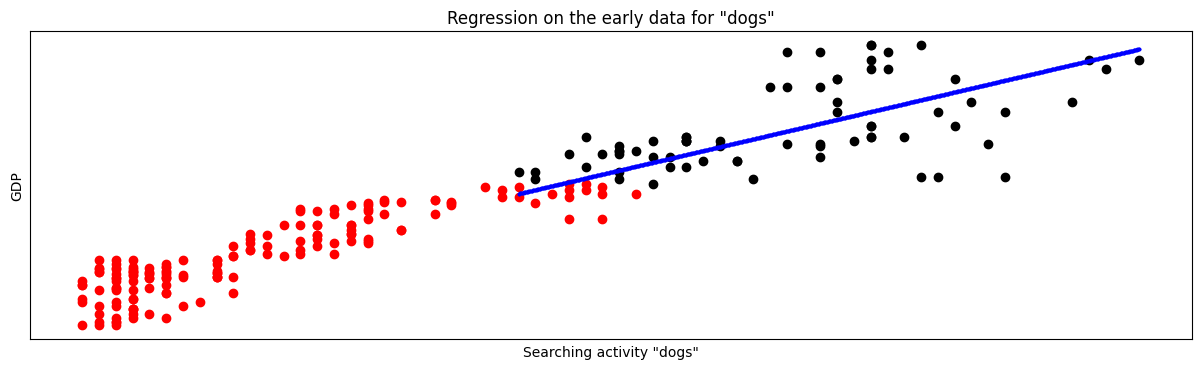

Name:  food
Coefficient: 244.86289087936146 Intercept: 4205.68661425475
Mean squared error: 4465751.76
Coefficient of correlation: 0.82


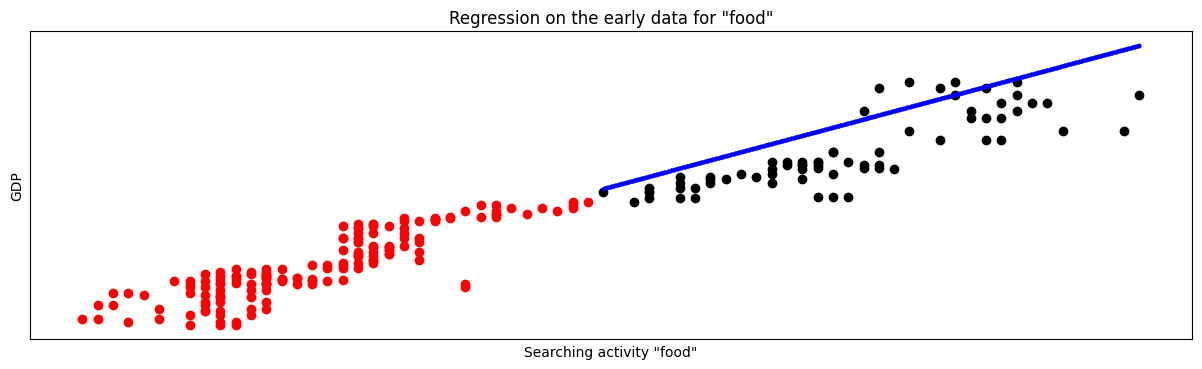

Name:  mexico
Coefficient: -118.2213266483606 Intercept: 21718.997242775702
Mean squared error: 59985103.44
Coefficient of correlation: -0.29


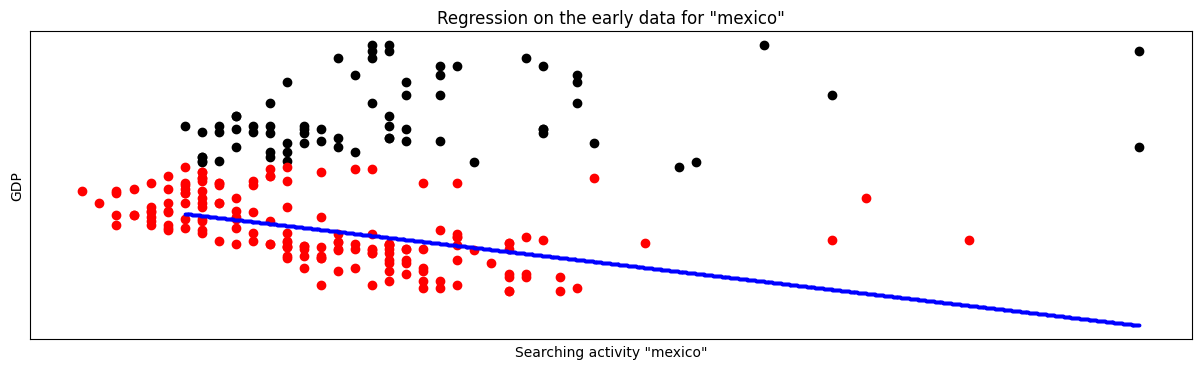

Name:  fitness club
Coefficient: -115.16213943981651 Intercept: 21391.97771121906
Mean squared error: 21870780.66
Coefficient of correlation: 0.23


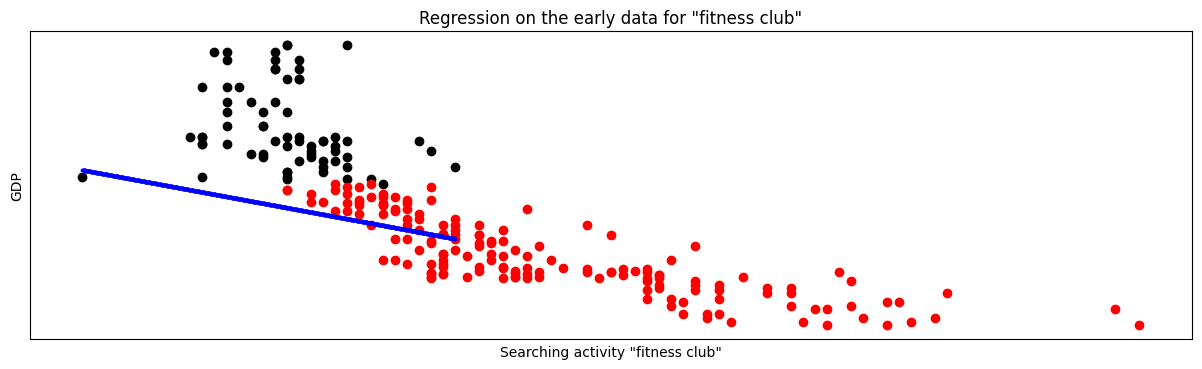

Name:  vacation
Coefficient: -76.71517323430812 Intercept: 20250.7937831186
Mean squared error: 37432593.78
Coefficient of correlation: 0.02


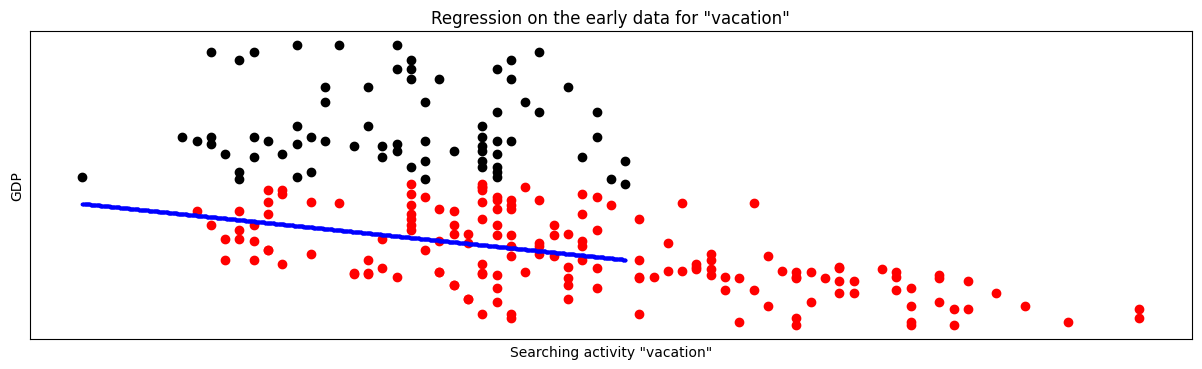

Name:  buy a car
Coefficient: 137.7982784539848 Intercept: 8440.952386650155
Mean squared error: 11057597.31
Coefficient of correlation: 0.63


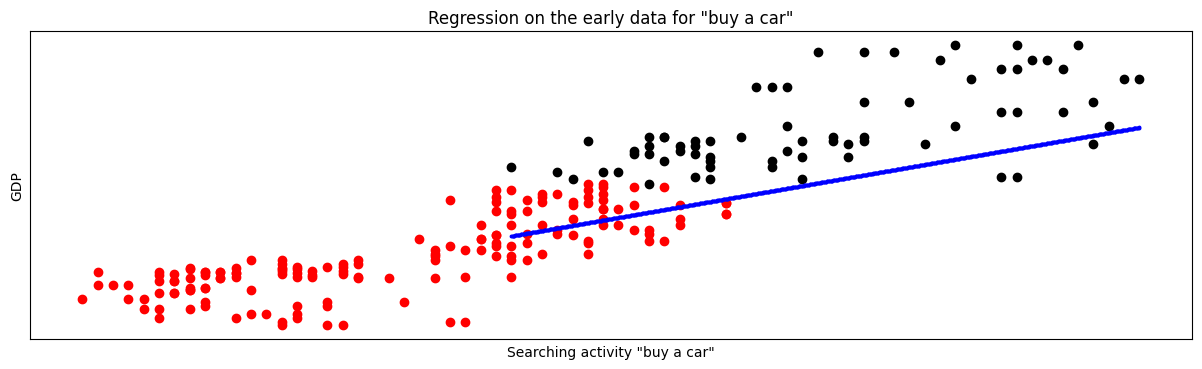

In [300]:
results = pd.DataFrame()
Query = []
MSE = []
Coefficient_of_Correlation = []
Slope = []
counter = 0

for search in queries_to_test:
    X = df[search]
    y = df['GDP']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


    LR = linear_model.LinearRegression()

    # Train the model using the training sets
    LR.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = LR.predict(X_test)

    if (counter <= 5):
        #Name of parameter
        print("Name: ", search[0])
        # The coefficients
        print("Coefficient:", LR.coef_[0], "Intercept:", LR.intercept_)
        # The mean squared error
        print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
        print("Coefficient of correlation: %.2f" % np.corrcoef(y_test, y_pred)[0][1])
        # Plot outputs
        plt.scatter(X_test, y_test, color="black")
        plt.scatter(X_train, y_train, color="red")

        x_plot = np.linspace(X_test.min(), X_test.max(), 1000)
        y_plot = LR.coef_* x_plot + LR.intercept_

        plt.scatter(x_plot, y_plot, color="blue", s=3)
        plt.xticks(())
        plt.yticks(())
        plt.title(f"Regression on the early data for \"{search[0]}\"")
        plt.xlabel(f"Searching activity \"{search[0]}\"")
        plt.ylabel("GDP")
        plt.show()
        counter += 1
    Query.append(str(search[0]))
    MSE.append(round(mean_squared_error(y_test, y_pred), 2))
    Slope.append(LR.coef_[0])
    Coefficient_of_Correlation.append(round(np.corrcoef(y_test, y_pred)[0][1], 2))


results['Query'] = Query
results['MSE'] = MSE
results['Slope'] = Slope
results['Coefficient of Correlation'] = Coefficient_of_Correlation


We get the following predictive power of searches. For the further analysis I will take searches with the smallest MSE and the highest absolute correlation.

In [270]:
results.sort_values('MSE', ascending=True)

,Query,MSE,Slope,Coefficient of Correlation
51,dogs,3.379917e+06,203.331805,0.58
0,food,4.465752e+06,244.862891,0.82
64,Taco Bell,5.174483e+06,126.431201,0.20
50,cats,5.247872e+06,334.149887,0.68
38,order food,5.555242e+06,209.985588,0.45
...,...,...,...,...
36,clothes,6.442615e+07,-125.652043,-0.51
49,loans,7.113749e+07,-431.525598,0.05
37,cheap clothes,7.294677e+07,82.188815,-0.92
31,stocks,8.759182e+07,-169.150888,0.09


In [272]:
results.sort_values('Coefficient of Correlation', ascending=True)

,Query,MSE,Slope,Coefficient of Correlation
37,cheap clothes,72946774.07,82.188815,-0.92
45,Facebook,59442265.25,38.423225,-0.86
40,food delivery,17433674.11,152.095357,-0.85
60,best songs,56330347.05,73.982319,-0.60
66,news,28290527.88,257.886867,-0.58
...,...,...,...,...
12,food near me,43275135.64,210.792537,0.68
50,cats,5247872.23,334.149887,0.68
9,sex,17282334.67,-84.755800,0.70
25,IT,10714948.45,112.862821,0.79


Now I only take trends with the highest correlation and the lowest MSE and make a df_best_trends which I will use further along.

<Axes: >

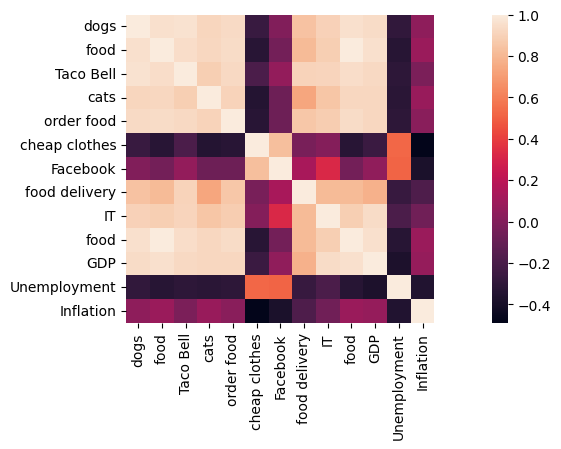

In [348]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df_best_trends = pd.DataFrame()
best_searches = ['dogs', 'food', 'Taco Bell', 'cats', 'order food', 'cheap clothes', 'Facebook', 'food delivery', 'IT', 'food', 'GDP', 'Unemployment', 'Inflation']
df_best_trends = df[best_searches]

sns.heatmap(df_best_trends.corr(), square=True)

I make a linear regression on all good parameters. I print the results with 'dogs'-searches on X-axis to demonstrate overall quality. The results are far from perfect because there is now underlying linear nature. However, introduction of the increased number of parametrs significantly improves quality.

Coefficients: 
 [-46.52873598  -1.81409905 118.88247712   5.94270588 -22.21254463
   1.25835772 -24.58541622 160.20102227 148.1973255   -1.81409905]
Mean squared error: 67356319.16
Coefficient of correlation: 0.84


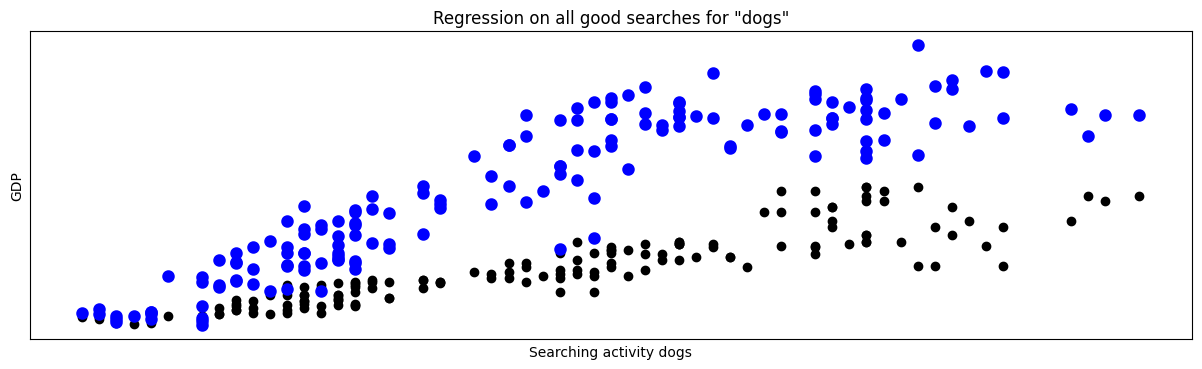

In [349]:
X = df_best_trends.drop(columns = ['Inflation', 'Unemployment', 'GDP'])
y = df_best_trends['GDP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=False)

LR = linear_model.LinearRegression()

# Train the model using the training sets
LR.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = LR.predict(X_test)

# The coefficients
print("Coefficients: \n", LR.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of correlation: %.2f" % np.corrcoef(y_test, y_pred)[0][1])


# Plot outputs
plt.scatter(X_test['dogs'], y_test, color="black")
plt.scatter(X_test['dogs'], y_pred, color="blue", linewidth=3)
plt.title(f"Regression GDP and all good searches for \"dogs\"")
plt.xlabel(f"Searching activity dogs")
plt.ylabel("GDP")

plt.xticks(())
plt.yticks(())

plt.show()


Now I add heavy artillery. I add information about GDP in previous quarter and also add information about the slope of regressions built on previous 9, 12, 15, 20 months of data.

In [350]:
df_best_trends['GDP_prev'] = df_best_trends['GDP'].shift(3)
df_best_trends

/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/4006590143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_trends['GDP_prev'] = df_best_trends['GDP'].shift(3)


,dogs,food,Taco Bell,cats,order food,cheap clothes,Facebook,food delivery,IT,food,GDP,Unemployment,Inflation,GDP_prev
date,,,,,,,,,,,,,,
2004-01-01,39,41,9,46,22,35,0,15,22,41,11923.447,5.7,2.035500,NaN
2004-02-01,38,40,8,42,13,42,0,13,22,40,11923.447,5.6,2.210000,NaN
2004-03-01,37,38,9,40,19,34,0,11,23,38,11923.447,5.8,2.271739,NaN
2004-04-01,38,40,9,41,16,38,0,12,24,40,12112.815,5.6,2.373810,11923.447
2004-05-01,39,41,9,39,16,38,0,13,24,41,12112.815,5.6,2.512500,11923.447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,81,83,68,74,65,28,18,35,88,83,26137.992,3.6,2.444500,25723.941
2022-12-01,85,87,69,78,63,26,19,42,90,87,26137.992,3.5,2.316667,25723.941
2023-01-01,84,85,66,76,56,22,18,36,87,85,26486.287,3.4,2.234000,26137.992


In [351]:
 # Define the size of the sliding window
window_size = [9, 12, 15, 20]


# Loop through the dataframe using a sliding window
for size in window_size:
    # Initialize an empty list to store the regression coefficients
    coefficients = []
    for i in range(len(df_best_trends) - size + 1):
        # Extract the Google Trends data and GDP data for the current window
        window = df_best_trends.iloc[i:i+size]

        x = window[best_searches].values

        y = window['GDP'].values.reshape(-1, 1)


        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(x, y)

        # Store the regression coefficient for the current window
        coefficients.append(model.coef_[0][0])

    # Add the regression coefficients to the dataframe
    df_best_trends["Regression Coefficients %.2f" % size] = np.nan
    df_best_trends.iloc[size-1:, df_best_trends.columns.get_loc("Regression Coefficients %.2f" % size)] = coefficients
df_best_trends = df_best_trends[20:]
df_best_trends

/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/1365608381.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_trends["Regression Coefficients %.2f" % size] = np.nan
/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/1365608381.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_trends["Regression Coefficients %.2f" % size] = np.nan
/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/1365608381.py:26: SettingWithCopyWarning: 
A value is trying to be

,dogs,food,Taco Bell,cats,order food,cheap clothes,Facebook,food delivery,IT,food,GDP,Unemployment,Inflation,GDP_prev,Regression Coefficients 9.00,Regression Coefficients 12.00,Regression Coefficients 15.00,Regression Coefficients 20.00
date,,,,,,,,,,,,,,,,,,
2005-09-01,37,39,11,37,18,47,2,16,24,39,13142.642,5.0,2.610952,12922.656,-0.000400,0.000008,-2.801259e-14,-4.619991e-14
2005-10-01,37,40,10,39,17,45,2,16,26,40,13324.204,5.0,2.633000,13142.642,-0.000078,-0.000075,6.718409e-15,2.162100e-14
2005-11-01,40,43,10,39,20,44,2,14,26,43,13324.204,5.0,2.479000,13142.642,-0.000201,0.000006,-6.821816e-15,-1.399593e-14
2005-12-01,40,39,10,39,21,36,2,16,28,39,13324.204,4.9,2.307143,13142.642,0.001498,0.000006,4.758534e-15,-1.713638e-14
2006-01-01,46,42,11,42,22,35,2,17,26,42,13599.160,4.7,2.413000,13324.204,0.001514,-0.000007,-1.148841e-14,-1.211796e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,81,83,68,74,65,28,18,35,88,83,26137.992,3.6,2.444500,25723.941,0.000109,0.000009,2.328350e-14,3.201294e-14
2022-12-01,85,87,69,78,63,26,19,42,90,87,26137.992,3.5,2.316667,25723.941,0.000010,0.000021,-7.170608e-15,-1.202930e-14
2023-01-01,84,85,66,76,56,22,18,36,87,85,26486.287,3.4,2.234000,26137.992,0.000320,0.000022,-3.012374e-14,1.069477e-15


Coefficients: 
 [-1.49061360e+01 -1.26658512e+00  5.37556476e+00  1.24645393e+01
 -7.71384352e-02 -7.20009118e+00  3.85515588e+00  1.46825132e+01
 -1.84907450e+00 -1.26658521e+00  8.58803984e-01 -5.37136974e+02
 -4.61701446e+04 -1.22916180e-07  9.78666145e-07]
Mean squared error: 559979.17
Coefficient of correlation: 0.99


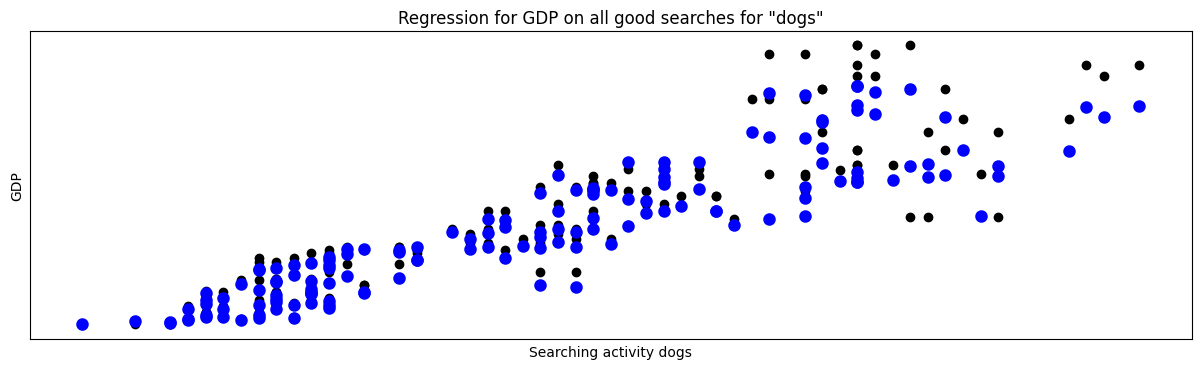

In [352]:
X = df_best_trends.drop(columns = ['GDP', 'Unemployment', 'Inflation'])


y = df_best_trends['GDP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=False)

LR = linear_model.LinearRegression()

# Train the model using the training sets
LR.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = LR.predict(X_test)

# The coefficients
print("Coefficients: \n", LR.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of correlation: %.2f" % np.corrcoef(y_test, y_pred)[0][1])

# Plot outputs
plt.scatter(X_test['dogs'], y_test, color="black")
plt.scatter(X_test['dogs'], y_pred, color="blue", linewidth=3)
plt.title(f"Regression for GDP on many searches shown for \"dogs\"")
plt.xlabel(f"Searching activity dogs")
plt.ylabel("GDP")

plt.xticks(())
plt.yticks(())

plt.show()


### Conclusion: As we can see the prediction has a 0.98 correlation with the test data and MSE has decreased at least 3 times comparing to the best MSE that we had during the analysis. The graphic is also looks much better than before.

## The same improved linear regression for inflation

Add previous period

In [359]:
df_best_trends = df[best_searches]
df_best_trends['Inflation_prev'] = df_best_trends['Inflation'].shift(1)
df_best_trends

/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/2093398066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_trends['Inflation_prev'] = df_best_trends['Inflation'].shift(1)


,dogs,food,Taco Bell,cats,order food,cheap clothes,Facebook,food delivery,IT,food,GDP,Unemployment,Inflation,Inflation_prev
date,,,,,,,,,,,,,,
2004-01-01,39,41,9,46,22,35,0,15,22,41,11923.447,5.7,2.035500,NaN
2004-02-01,38,40,8,42,13,42,0,13,22,40,11923.447,5.6,2.210000,2.035500
2004-03-01,37,38,9,40,19,34,0,11,23,38,11923.447,5.8,2.271739,2.210000
2004-04-01,38,40,9,41,16,38,0,12,24,40,12112.815,5.6,2.373810,2.271739
2004-05-01,39,41,9,39,16,38,0,13,24,41,12112.815,5.6,2.512500,2.373810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,81,83,68,74,65,28,18,35,88,83,26137.992,3.6,2.444500,2.470500
2022-12-01,85,87,69,78,63,26,19,42,90,87,26137.992,3.5,2.316667,2.444500
2023-01-01,84,85,66,76,56,22,18,36,87,85,26486.287,3.4,2.234000,2.316667


In [360]:
# Define the size of the sliding window
window_size = [9, 12, 15, 20]

# Loop through the dataframe using a sliding window
for size in window_size:
    # Initialize an empty list to store the regression coefficients
    coefficients = []
    for i in range(len(df_best_trends) - size + 1):
        # Extract the Google Trends data and GDP data for the current window
        window = df_best_trends.iloc[i:i+size]

        x = window[best_searches].values

        y = window['Inflation'].values.reshape(-1, 1)


        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(x, y)

        # Store the regression coefficient for the current window
        coefficients.append(model.coef_[0][0])

    # Add the regression coefficients to the dataframe
    df_best_trends["Regression Coefficients %.2f" % size] = np.nan
    df_best_trends.iloc[size-1:, df_best_trends.columns.get_loc("Regression Coefficients %.2f" % size)] = coefficients
df_best_trends = df_best_trends[20:]
df_best_trends

/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/2232391282.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_trends["Regression Coefficients %.2f" % size] = np.nan
/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/2232391282.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_trends["Regression Coefficients %.2f" % size] = np.nan
/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/2232391282.py:25: SettingWithCopyWarning: 
A value is trying to be

,dogs,food,Taco Bell,cats,order food,cheap clothes,Facebook,food delivery,IT,food,GDP,Unemployment,Inflation,Inflation_prev,Regression Coefficients 9.00,Regression Coefficients 12.00,Regression Coefficients 15.00,Regression Coefficients 20.00
date,,,,,,,,,,,,,,,,,,
2005-09-01,37,39,11,37,18,47,2,16,24,39,13142.642,5.0,2.610952,2.412174,0.028174,0.000538,3.900351e-17,-8.960948e-17
2005-10-01,37,40,10,39,17,45,2,16,26,40,13324.204,5.0,2.633000,2.610952,0.007984,-0.025993,1.418215e-17,-2.157141e-17
2005-11-01,40,43,10,39,20,44,2,14,26,43,13324.204,5.0,2.479000,2.633000,0.008799,0.008126,-2.322234e-17,9.465807e-17
2005-12-01,40,39,10,39,21,36,2,16,28,39,13324.204,4.9,2.307143,2.479000,-0.008310,0.005906,1.943579e-17,-1.084489e-16
2006-01-01,46,42,11,42,22,35,2,17,26,42,13599.160,4.7,2.413000,2.307143,-0.003246,0.001059,-1.829681e-17,2.636764e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,81,83,68,74,65,28,18,35,88,83,26137.992,3.6,2.444500,2.470500,0.024290,0.024099,1.355896e-16,-1.111700e-16
2022-12-01,85,87,69,78,63,26,19,42,90,87,26137.992,3.5,2.316667,2.444500,0.020315,0.022825,1.318982e-16,3.288280e-18
2023-01-01,84,85,66,76,56,22,18,36,87,85,26486.287,3.4,2.234000,2.316667,0.007908,0.022710,5.925553e-17,5.131868e-19


Coefficients: 
 [-4.83125147e-03  5.47708448e-03 -4.46444139e-03  3.23867511e-02
  2.95458005e-03 -1.59666546e-02  7.54407150e-03  3.64453247e-02
 -2.32105171e-02  5.47708448e-03  8.45447614e-01 -1.77976706e+00
  2.72251353e-01  6.22646280e-16 -3.56802618e-16]
Mean squared error: 1.34
Coefficient of correlation: 0.45


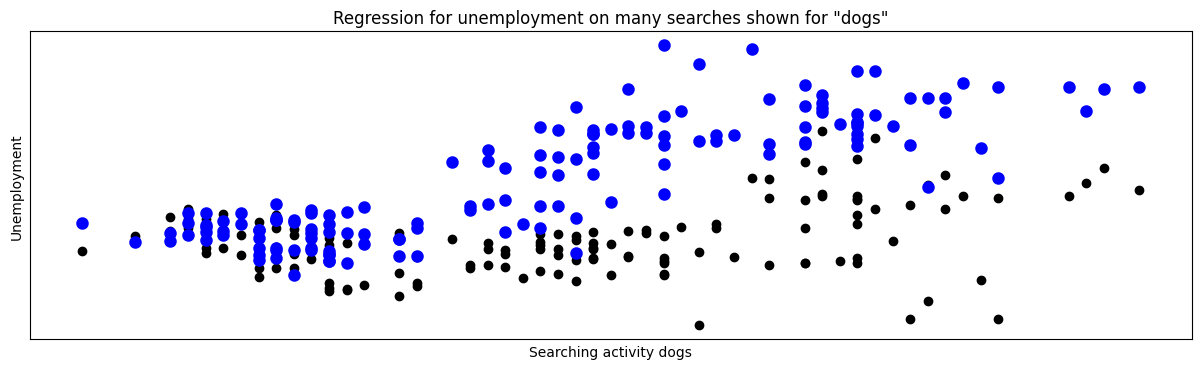

In [361]:
X = df_best_trends.drop(columns = ['GDP', 'Unemployment', 'Inflation'])


y = df_best_trends['Inflation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=False)

LR = linear_model.LinearRegression()

# Train the model using the training sets
LR.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = LR.predict(X_test)

# The coefficients
print("Coefficients: \n", LR.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of correlation: %.2f" % np.corrcoef(y_test, y_pred)[0][1])

# Plot outputs
plt.scatter(X_test['dogs'], y_test, color="black")
plt.scatter(X_test['dogs'], y_pred, color="blue", linewidth=3)
plt.title(f"Regression for inflation on many searches shown for \"dogs\"")
plt.xlabel(f"Searching activity dogs")
plt.ylabel("Unemployment")

plt.xticks(())
plt.yticks(())

plt.show()


## The same improved linear regression for unemployment


In [362]:
df_best_trends = df[best_searches]
df_best_trends['Unemployment_prev'] = df_best_trends['Unemployment'].shift(1)
df_best_trends

/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/861569147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_trends['Unemployment_prev'] = df_best_trends['Unemployment'].shift(1)


,dogs,food,Taco Bell,cats,order food,cheap clothes,Facebook,food delivery,IT,food,GDP,Unemployment,Inflation,Unemployment_prev
date,,,,,,,,,,,,,,
2004-01-01,39,41,9,46,22,35,0,15,22,41,11923.447,5.7,2.035500,NaN
2004-02-01,38,40,8,42,13,42,0,13,22,40,11923.447,5.6,2.210000,5.7
2004-03-01,37,38,9,40,19,34,0,11,23,38,11923.447,5.8,2.271739,5.6
2004-04-01,38,40,9,41,16,38,0,12,24,40,12112.815,5.6,2.373810,5.8
2004-05-01,39,41,9,39,16,38,0,13,24,41,12112.815,5.6,2.512500,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,81,83,68,74,65,28,18,35,88,83,26137.992,3.6,2.444500,3.7
2022-12-01,85,87,69,78,63,26,19,42,90,87,26137.992,3.5,2.316667,3.6
2023-01-01,84,85,66,76,56,22,18,36,87,85,26486.287,3.4,2.234000,3.5


In [363]:
# Define the size of the sliding window
window_size = [9, 12, 15, 20]

# Loop through the dataframe using a sliding window
for size in window_size:
    # Initialize an empty list to store the regression coefficients
    coefficients = []
    for i in range(len(df_best_trends) - size + 1):
        # Extract the Google Trends data and GDP data for the current window
        window = df_best_trends.iloc[i:i+size]

        x = window[best_searches].values

        y = window['Unemployment'].values.reshape(-1, 1)


        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(x, y)

        # Store the regression coefficient for the current window
        coefficients.append(model.coef_[0][0])

    # Add the regression coefficients to the dataframe
    df_best_trends["Regression Coefficients %.2f" % size] = np.nan
    df_best_trends.iloc[size-1:, df_best_trends.columns.get_loc("Regression Coefficients %.2f" % size)] = coefficients
df_best_trends = df_best_trends[20:]
df_best_trends

/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/570382607.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_trends["Regression Coefficients %.2f" % size] = np.nan
/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/570382607.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_trends["Regression Coefficients %.2f" % size] = np.nan
/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/570382607.py:25: SettingWithCopyWarning: 
A value is trying to be se

,dogs,food,Taco Bell,cats,order food,cheap clothes,Facebook,food delivery,IT,food,GDP,Unemployment,Inflation,Unemployment_prev,Regression Coefficients 9.00,Regression Coefficients 12.00,Regression Coefficients 15.00,Regression Coefficients 20.00
date,,,,,,,,,,,,,,,,,,
2005-09-01,37,39,11,37,18,47,2,16,24,39,13142.642,5.0,2.610952,4.9,-0.018349,0.008156,-1.669031e-17,1.917674e-17
2005-10-01,37,40,10,39,17,45,2,16,26,40,13324.204,5.0,2.633000,5.0,-0.059288,-0.049648,3.245545e-17,-2.359187e-17
2005-11-01,40,43,10,39,20,44,2,14,26,43,13324.204,5.0,2.479000,5.0,-0.003069,-0.000002,2.743009e-19,6.447065e-17
2005-12-01,40,39,10,39,21,36,2,16,28,39,13324.204,4.9,2.307143,5.0,-0.001769,0.000848,1.284796e-17,5.110970e-17
2006-01-01,46,42,11,42,22,35,2,17,26,42,13599.160,4.7,2.413000,4.9,-0.012369,-0.007393,-1.079798e-16,2.560130e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,81,83,68,74,65,28,18,35,88,83,26137.992,3.6,2.444500,3.7,0.003760,0.006228,1.022179e-17,1.461057e-16
2022-12-01,85,87,69,78,63,26,19,42,90,87,26137.992,3.5,2.316667,3.6,-0.000148,0.000493,-1.073780e-16,-7.406702e-17
2023-01-01,84,85,66,76,56,22,18,36,87,85,26486.287,3.4,2.234000,3.5,-0.000327,-0.001106,-1.513521e-18,2.808414e-18


Coefficients: 
 [ 3.65160592e-03  1.21135347e-03 -1.27482948e-02  4.72366603e-03
 -3.35046968e-03  1.35211130e-02 -2.12572515e-03 -9.26582072e-04
  4.59287034e-03  1.21135347e-03  9.75948721e-01  1.98734867e-01
  2.63762605e-01 -3.30923279e-16 -3.11577480e-16]
Mean squared error: 0.89
Coefficient of correlation: 0.91


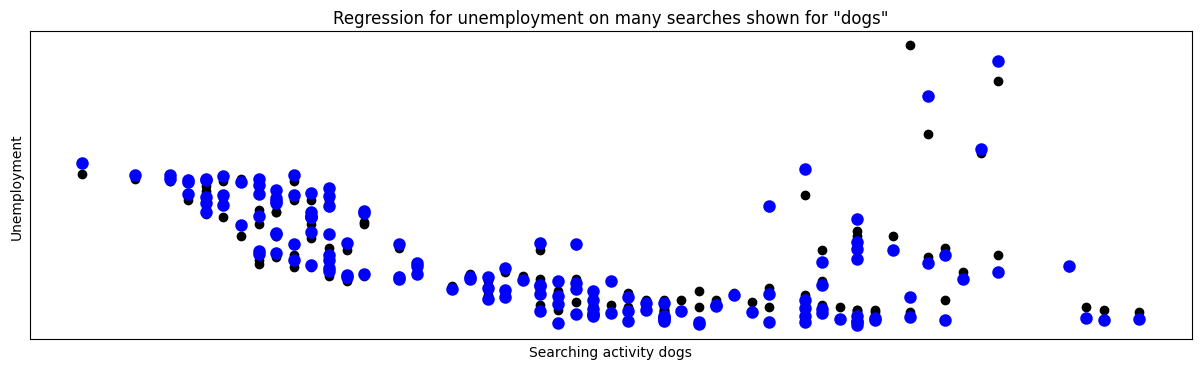

In [365]:
X = df_best_trends.drop(columns = ['GDP', 'Unemployment', 'Inflation'])


y = df_best_trends['Unemployment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=False)

LR = linear_model.LinearRegression()

# Train the model using the training sets
LR.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = LR.predict(X_test)

# The coefficients
print("Coefficients: \n", LR.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of correlation: %.2f" % np.corrcoef(y_test, y_pred)[0][1])

# Plot outputs
plt.scatter(X_test['dogs'], y_test, color="black")
plt.scatter(X_test['dogs'], y_pred, color="blue", linewidth=3)
plt.title(f"Regression for unemployment on many searches shown for \"dogs\"")
plt.xlabel(f"Searching activity dogs")
plt.ylabel("Unemployment")

plt.xticks(())
plt.yticks(())

plt.show()


# Part 2. Voting and Google Trends.

## Getting Data
I check which searches are most correlated with the popularity of political parties

Here I get GoogleTrend statistics for searches related to politics.

In [271]:
#We will need Google trends therefore we download unofficial google trends package
!pip install pytrends
!pip install plotly
!pip install country-converter

from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pytrends.request import TrendReq
pytrends = TrendReq()
import numpy as np
import numpy.linalg as LA
import io
import matplotlib.pyplot as plt


In [ ]:
queries_political = [ ['Biden'], ['Obama'], ['Facebook'], ['abortions'], ['fox news'], ['CNN'], ['netflix'], ['Elon Musk'], ['transgenders']]



# requesting data
interest_by_region_df = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)



code_state = {"AL":"Alabama", "AK":"Alaska", "AZ":"Arizona", "AR":"Arkansas", "CA":"California", "CO":"Colorado",
              "CT":"Connecticut", "DC":"Washington DC", "DE":"Delaware", "FL":"Florida", "GA":"Georgia",
              "HI":"Hawaii", "ID":"Idaho", "IL":"Illinois", "IN":"Indiana", "IA":"Iowa", "KS":"Kansas",
              "KY":"Kentucky", "LA":"Louisiana", "ME":"Maine", "MD":"Maryland", "MA":"Massachusetts",
              "MI":"Michigan", "MN":"Minnesota", "MS":"Mississippi", "MO":"Missouri", "MT":"Montana",
              "NE":"Nebraska", "NV":"Nevada", "NH":"New Hampshire", "NJ":"New Jersey", "NM":"New Mexico",
              "NY":"New York", "NC":"North Carolina", "ND":"North Dakota", "OH":"Ohio", "OK":"Oklahoma",
              "OR":"Oregon", "PA":"Pennsylvania", "RI":"Rhode Island", "SC":"South Carolina", "SD":"South Dakota",
              "TN":"Tennessee", "TX":"Texas", "UT":"Utah", "VT":"Vermont", "VA":"Virginia", "WA":"Washington",
              "WV":"West Virginia","WI":"Wisconsin", "WY":"Wyoming"}
for search in queries_political:
    pytrends.build_payload(search, geo='US')
    interest_by_region_df[search] = pytrends.interest_by_region()
interest_by_region_df.to_csv('df_2.csv')


### Combining Trends Data with voting data

I download that I got in the section above again (therefor you can skip section above).

In [597]:
df_political = pd.read_csv('data/df_2.csv')
df_political

,geoName,Obama,Biden,Facebook,abortions,fox news,CNN,netflix,Elon Musk,transgenders
0,Alabama,43,46,79,79,86,40,74,68,90
1,Alaska,37,53,74,82,76,68,78,72,51
2,Arizona,43,56,65,80,69,66,81,82,77
3,Arkansas,34,46,76,78,62,37,74,67,82
4,California,47,49,51,67,33,57,87,100,58
5,Colorado,43,51,65,77,62,70,81,91,60
6,Connecticut,48,59,57,56,49,72,87,73,74
7,Delaware,47,80,74,79,60,72,84,68,83
8,District of Columbia,100,100,46,82,38,100,81,82,57
9,Florida,46,55,58,73,55,62,79,85,66


States Maine and Nebraska have a number of separate voting districts. I take the mean value of all districts related to 1 state.

In [598]:
df_votes = pd.read_csv('data/Voting.csv')[4:].sort_values('state')
df_votes = df_votes[['state','dem_percent', 'rep_percent', 'other_percent']].drop(index=19, axis = 1)
df_votes['dem_percent'] = list(map(lambda x: x[:-1], df_votes['dem_percent'].values))
df_votes['rep_percent'] = list(map(lambda x: x[:-1], df_votes['rep_percent'].values))
df_votes['other_percent'] = list(map(lambda x: x[:-1], df_votes['other_percent'].values))
df_votes['dem_percent'] = [float(x) for x in df_votes['dem_percent'].values]
df_votes['rep_percent']  = [float(x) for x in df_votes['rep_percent'] .values]
df_votes['other_percent'] = [float(x) for x in df_votes['other_percent'].values]

In [599]:
df_votes

,state,dem_percent,rep_percent,other_percent
20,Alabama,36.6,62.0,1.4
21,Alaska,42.8,52.8,4.4
4,Arizona,49.4,49.1,1.6
22,Arkansas,34.8,62.4,2.8
23,California,63.5,34.3,2.2
24,Colorado,55.4,41.9,2.7
25,Connecticut,59.3,39.2,1.6
26,Delaware,58.7,39.8,1.5
27,District of Columbia,92.1,5.4,2.5
5,Florida,47.9,51.2,0.9


In [600]:
list_of_value = ['Nebraska 1st District', 'Nebraska 2nd District', 'Nebraska 3rd District']
df2 = df_votes.query('state in @list_of_value')
df2 = df2.iloc[:, 1:4].mean(axis = 0)
df2

dem_percent      38.633333
rep_percent      59.200000
other_percent     2.100000
dtype: float64

In [601]:
df_votes
list_of_value = ['Maine','Maine 1st District', 'Maine 2nd District']
df3 = df_votes.query('state in @list_of_value')
df3 = df3.iloc[:, 1:4].mean(axis=0)
df3

dem_percent      52.666667
rep_percent      44.433333
other_percent     2.900000
dtype: float64

In [602]:
df_votes = pd.concat([df_votes, pd.DataFrame.from_records([{'state': 'Nebraska', 'dem_percent':df2['dem_percent'], 'rep_percent':df2['rep_percent'], 'other_percent':df2['other_percent']}])], ignore_index=True)

In [603]:
df_votes = pd.concat([df_votes, pd.DataFrame.from_records([{'state': 'Maine', 'dem_percent':df3['dem_percent'], 'rep_percent':df3['rep_percent'], 'other_percent':df3['other_percent']}])], ignore_index=True)

In [604]:
df_votes.drop([19, 20, 21, 29, 30, 31, 32], inplace=True)

In [605]:
df_votes = df_votes.set_index('state')

In [606]:
code_state = {"AL":"Alabama", "AK":"Alaska", "AZ":"Arizona", "AR":"Arkansas", "CA":"California", "CO":"Colorado",
              "CT":"Connecticut", "DC":"District of Columbia", "DE":"Delaware", "FL":"Florida", "GA":"Georgia",
              "HI":"Hawaii", "ID":"Idaho", "IL":"Illinois", "IN":"Indiana", "IA":"Iowa", "KS":"Kansas",
              "KY":"Kentucky", "LA":"Louisiana", "ME":"Maine", "MD":"Maryland", "MA":"Massachusetts",
              "MI":"Michigan", "MN":"Minnesota", "MS":"Mississippi", "MO":"Missouri", "MT":"Montana",
              "NE":"Nebraska", "NV":"Nevada", "NH":"New Hampshire", "NJ":"New Jersey", "NM":"New Mexico",
              "NY":"New York", "NC":"North Carolina", "ND":"North Dakota", "OH":"Ohio", "OK":"Oklahoma",
              "OR":"Oregon", "PA":"Pennsylvania", "RI":"Rhode Island", "SC":"South Carolina", "SD":"South Dakota",
              "TN":"Tennessee", "TX":"Texas", "UT":"Utah", "VT":"Vermont", "VA":"Virginia", "WA":"Washington",
              "WV":"West Virginia","WI":"Wisconsin", "WY":"Wyoming"}
state_code = dict([(value, key) for key, value in code_state.items()])

Now df_political and df_votes have the same set of states. I also add state codes so I can creat maps using geoName.map.

In [607]:
df_political["state_code"] = df_political.geoName.map(state_code)
df_political

,geoName,Obama,Biden,Facebook,abortions,fox news,CNN,netflix,Elon Musk,transgenders,state_code
0,Alabama,43,46,79,79,86,40,74,68,90,AL
1,Alaska,37,53,74,82,76,68,78,72,51,AK
2,Arizona,43,56,65,80,69,66,81,82,77,AZ
3,Arkansas,34,46,76,78,62,37,74,67,82,AR
4,California,47,49,51,67,33,57,87,100,58,CA
5,Colorado,43,51,65,77,62,70,81,91,60,CO
6,Connecticut,48,59,57,56,49,72,87,73,74,CT
7,Delaware,47,80,74,79,60,72,84,68,83,DE
8,District of Columbia,100,100,46,82,38,100,81,82,57,DC
9,Florida,46,55,58,73,55,62,79,85,66,FL


Now we can see how popular Facebook search in different American states.

In [608]:
KEYWORD = 'Facebook'
fig = go.Figure(data=go.Choropleth(
    locations=df_political['state_code'],
    z = df_political[KEYWORD],
    locationmode = 'USA-states',
    colorscale = 'Blues',
    colorbar_title = "Trend value",
))
fig.update_layout(
    title_text=f'"{KEYWORD}" searches by state',
    geo_scope='usa',
)
fig.show()

Now I finally combine Voting results and Google Trends data.

In [ ]:
df_political.set_index('geoName', inplace=True)
df_political['dem_percent'] = df_votes['dem_percent']
df_political['rep_percent'] = df_votes['rep_percent']
df_political['other_percent'] = df_votes['other_percent']

In this map the popularity of democratic party in the elcetions 2020 is shown.

In [ ]:
KEYWORD = 'dem_percent'
fig = go.Figure(data=go.Choropleth(
    locations=df_political['state_code'],
    z = df_political[KEYWORD],
    locationmode = 'USA-states',
    colorscale = 'Blues',
    colorbar_title = "Trend value",
))
fig.update_layout(
    title_text=f'"{KEYWORD}" searches by state',
    geo_scope='usa',
)
fig.show()

### Conclusions: Finally, I create a heatmap which shows correlation between different searches and election results. As we can see all searches have high absolute correlation. The strongest correlation with election results (positive or negative) have searches "Obama", "fox news" and "CNN".

<Axes: >

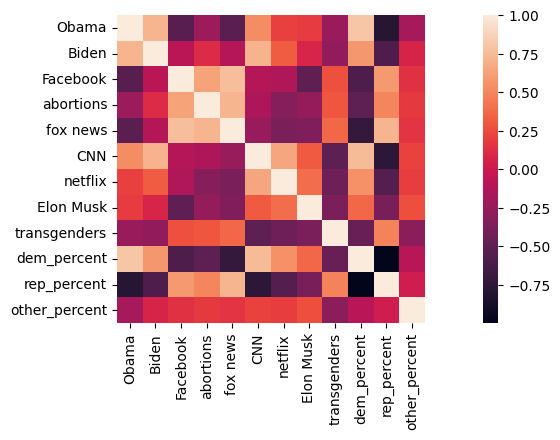

In [614]:
sns.heatmap(df_political.drop(columns = 'state_code').corr(), square=True)

Here I take very 'democratic' searches and show how uneven their popularity among the states. We can also notice that this searches are very common in the DC, which is the most democratic state.

In [683]:
import plotly.express as px

kw_list = ['Facebook', 'Biden', 'Obama']
fig = px.bar(df_political, x='state_code', y=kw_list)
fig.update_layout(
    title_text=f'"Democratic" search volumes by state',
    legend_title_text='Search terms'
)
fig.update_yaxes(title_text='Volume')
fig.update_xaxes(title_text='State')
fig.show()

# Part 3 Demand on rental apartments in Europe and realation to Google Trends searches

Here is the scraping code with a Scrapy spider. I commented it because scraping takes about 4-5 hours and I have already saved the result of scraping in the apartaments.csv file. If you want to run scraping anyway delete # and run. Also, check out file lngtermlettings.py to know more about scraping. I collected information about more than 170k rental offers.

In [479]:
#!scrapy runspider longtermlettings.py

2023-06-11 23:24:21 [scrapy.utils.log] INFO: Scrapy 2.9.0 started (bot: scrapybot)
2023-06-11 23:24:21 [scrapy.utils.log] INFO: Versions: lxml 4.9.2.0, libxml2 2.9.4, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.1, Twisted 22.10.0, Python 3.11.3 (v3.11.3:f3909b8bc8, Apr  4 2023, 20:12:10) [Clang 13.0.0 (clang-1300.0.29.30)], pyOpenSSL 23.2.0 (OpenSSL 3.1.1 30 May 2023), cryptography 41.0.1, Platform macOS-12.6-arm64-arm-64bit
2023-06-11 23:24:22 [scrapy.crawler] INFO: Overridden settings:
{'SPIDER_LOADER_WARN_ONLY': True}
2023-06-11 23:24:22 [py.warnings] WARNING: /Users/alina/Programming/Data-Analysis-Project/venv/lib/python3.11/site-packages/scrapy/utils/request.py:232: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons

In [620]:
df_apartments = pd.read_csv('data/apartments.csv')
df_apartments = df_apartments.dropna()
df_apartments

,Title,Price,Bedrooms,Bathrooms,Longitude,Latitude
0,"Lisbon, Santo António",2380,1,1,-9.146011,38.728235
1,"London, Canary Wharf",4273,1,1,-0.019200,51.499553
2,"Lisbon, Principe Real",1810,1,1,-9.146772,38.717176
3,"Lisbon, Parque das Naçoes",2170,1,1,-9.097876,38.774658
4,"London, Canary Wharf",3170,1,1,-0.019168,51.501474
...,...,...,...,...,...,...
179819,"Granada, Calle Gran Vía de Colón",340,4,1,-3.599387,37.179984
179820,"Istanbul, Degirmen sokak",308,4,1,28.981018,41.046685
179821,"Barcelona, Carrer de las Navas de Tolosa, 080",440,5,1,2.182318,41.418100
179822,"Rome, Via Salvatore di Giacomo",380,4,2,12.487500,41.846527


Here is the map with all offers. We can see that all offers are concentrated in the big cities and are not really spread.

In [487]:
import folium
import pandas as pd

# create a folium map centered on Europe
map_rental = folium.Map(location=[50, 10], zoom_start=4)

# add markers for each rental offer location
for i, row in df_apartments.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(map_rental)

# display the map
map_rental

For the further work I take a sample of the initial dataset because the following code is really slow.

In [626]:
df_apartments = df_apartments.sample(3000)

Here I get the country of the offer from the coordinates that I was able to get from scraping.

In [682]:
from pytrends.request import TrendReq

# Set up the Pytrends client
pytrends = TrendReq()

# Define the query and the timeframe
kw_list = ['rent flat']
timeframe = 'today 5-y'

# Define the list of European countries to search
european_countries = ['AT', 'BE', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IE', 'IT', 'LV', 'LT', 'LU', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SI', 'ES', 'SE', 'CH', 'GB', 'IS', 'RU']

# Create an empty dictionary to store the search results
results = {}

# Loop through the list of countries and get the search data
for country in european_countries:
    # Set the location to the current country
    pytrends.build_payload(kw_list, cat=0, timeframe=timeframe, geo=country)
    # Get the search data for the current country
    data = pytrends.interest_over_time()
    # Add the search data to the results dictionary
    results[country] = data['rent flat'].mean()

# Print the results
print(results)

{'AT': 15.9, 'BE': 18.584615384615386, 'BG': 14.438461538461539, 'HR': 12.465384615384615, 'CY': 34.026923076923076, 'CZ': 22.676923076923078, 'DK': 14.696153846153846, 'EE': 10.361538461538462, 'FI': 11.353846153846154, 'FR': 33.83461538461538, 'DE': 42.68076923076923, 'GR': 21.01153846153846, 'HU': 20.453846153846154, 'IE': 30.253846153846155, 'IT': 34.315384615384616, 'LV': 7.5, 'LT': 15.784615384615385, 'LU': 11.138461538461538, 'MT': 9.71923076923077, 'NL': 18.265384615384615, 'PL': 40.47692307692308, 'PT': 23.25, 'RO': 23.596153846153847, 'SK': 12.123076923076923, 'SI': 9.86923076923077, 'ES': 32.276923076923076, 'SE': 12.934615384615384, 'CH': 22.869230769230768, 'GB': 77.3076923076923, 'IS': 7.7, 'RU': 24.630769230769232}


Here I get the country of the offer from the coordinates that I was able to get from scraping.


In [627]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="apartments")


def get_country(row):
    location = geolocator.reverse(f"{row['Latitude']}, {row['Longitude']}")
    return location.raw['address']['country_code'].upper()


df_apartments['country'] = df_apartments.apply(get_country, axis=1)

In [628]:
df_apartments

,Title,Price,Bedrooms,Bathrooms,Longitude,Latitude,country
112364,Woking Room for rent,755,2,1,-0.555900,51.319300,GB
125893,Salcombe Apartment for rent,11832,3,3,-3.771504,50.234516,GB
3180,"Paris, Rue du Mont Cenis",1432,0,1,2.341760,48.887780,FR
128992,"Porto Oporto, Miragaia",6576,2,1,-8.620757,41.144462,PT
86427,"Barcelona, Carrer de Balmes",750,3,1,2.144046,41.403140,ES
...,...,...,...,...,...,...,...
42969,"Turin-Torino, Strada del Fortino",620,1,1,7.678390,45.085560,IT
175026,"Milan, Via Paolo Bassi",905,3,1,9.189761,45.495837,IT
83170,"Milan, Via Giuseppe Frua",965,4,2,9.148890,45.465329,IT
11462,"Lisbon, Rua de São Gens",1550,2,1,-9.130650,38.719260,PT


Now I look into average price by country. The cheapest offers are in Latvia, Slovenia and Lithuania. The most expensive offers are in Croatia and Greece. It corresponds with the common perception. However, it is important to point out that countries with lowest prices appear in the sample only one or couple times, so it can distort results.

In [687]:
mean_val = df_apartments[['Price', 'country']].groupby('country').mean().sort_values(by='Price').drop(['GI', 'TR', 'NO'])
mean_val['Size'] = df_apartments[['Price', 'country']].groupby('country').size()
mean_val

,Price,Size
country,,
LV,400.000000,1
SI,494.000000,5
LT,509.000000,1
RO,750.000000,1
IS,807.500000,2
SE,811.571429,7
FI,842.333333,6
HU,844.000000,12
PL,1017.517241,29


Now I add apartment search as one of the columns.

In [689]:
mean_val['Popularity'] = [np.nan] * len(mean_val)
for cont in mean_val.index:
    mean_val['Popularity'][cont] = results[cont]
mean_val

/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/1443137048.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/1443137048.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel_2211/1443137048.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/03/ssf9zsbn6t5cy7hd_dwcj5x40000gn/T/ipykernel

,Price,Size,Popularity
country,,,
LV,400.000000,1,7.500000
SI,494.000000,5,9.869231
LT,509.000000,1,15.784615
RO,750.000000,1,23.596154
IS,807.500000,2,7.700000
SE,811.571429,7,12.934615
FI,842.333333,6,11.353846
HU,844.000000,12,20.453846
PL,1017.517241,29,40.476923


I had a hyposesis that the number of searches "rent apartament" should be positively correlated with the prices as more people are trying to find place to leave. However, in the data no signs of correlation was found. Correlation is very close to 0.

In [678]:
np.corrcoef(mean_val['Price'], mean_val['Popularity'])


array([[1.        , 0.04408983],
       [0.04408983, 1.        ]])

However, the number of listings in the sample has a positive correlation with the popularity of the 'rent apartament' search.

In [690]:
np.corrcoef(mean_val['Size'], mean_val['Popularity'])


array([[1.        , 0.40194588],
       [0.40194588, 1.        ]])

#Overall, I used Google Trends in many different contexts. Google Trends have some predictive power but clearly it is very limited.